<a href="https://colab.research.google.com/github/ppiont/cnn-soc-wagga/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive # import drive from google colab
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT, force_remount=True)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Thesis/cnn-soc-wagga"

/content/drive/My Drive/Thesis/cnn-soc-wagga


In [0]:
%%capture

!pip install geopandas

In [4]:
import pandas as pd
df = pd.read_csv("data/germany_targets.csv", index_col = 0)
df.head()

,POINT_ID,coarse,clay,silt,sand,pH_in_H2O,pH_in_CaCl2,OC,CaCO3,N,P,K,CEC,Notes,sample_ID,GPS_LAT,GPS_LONG,geometry
7620,46563124.0,8,13.0,63.0,24.0,5.26,4.83,20.0,0.0,2.1,11.4,49.0,8.5,NaN,2450,51.13,14.79,POINT (14.79 51.13)
7663,46543152.0,5,3.0,8.0,90.0,4.05,3.27,27.9,0.0,1.0,12.4,28.7,5.8,NaN,2808,51.38,14.79,POINT (14.79 51.38)
7664,46543138.0,14,7.0,28.0,64.0,3.85,3.44,32.2,0.0,1.9,28.8,58.7,5.9,NaN,1559,51.26,14.77,POINT (14.77 51.26)
7745,46483136.0,17,7.0,25.0,68.0,6.06,5.62,13.7,0.0,1.4,63.1,155.5,6.3,NaN,2438,51.24,14.69,POINT (14.69 51.24)
7809,46443178.0,9,4.0,12.0,84.0,4.90,4.29,20.3,1.0,0.8,0.0,22.2,3.3,NaN,2774,51.62,14.67,POINT (14.67 51.62)


In [0]:
import geopandas as gpd

In [0]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.GPS_LONG, df.GPS_LAT), crs = "EPSG:4326")

In [7]:
gdf.head()

,POINT_ID,coarse,clay,silt,sand,pH_in_H2O,pH_in_CaCl2,OC,CaCO3,N,P,K,CEC,Notes,sample_ID,GPS_LAT,GPS_LONG,geometry
7620,46563124.0,8,13.0,63.0,24.0,5.26,4.83,20.0,0.0,2.1,11.4,49.0,8.5,NaN,2450,51.13,14.79,POINT (14.79000 51.13000)
7663,46543152.0,5,3.0,8.0,90.0,4.05,3.27,27.9,0.0,1.0,12.4,28.7,5.8,NaN,2808,51.38,14.79,POINT (14.79000 51.38000)
7664,46543138.0,14,7.0,28.0,64.0,3.85,3.44,32.2,0.0,1.9,28.8,58.7,5.9,NaN,1559,51.26,14.77,POINT (14.77000 51.26000)
7745,46483136.0,17,7.0,25.0,68.0,6.06,5.62,13.7,0.0,1.4,63.1,155.5,6.3,NaN,2438,51.24,14.69,POINT (14.69000 51.24000)
7809,46443178.0,9,4.0,12.0,84.0,4.90,4.29,20.3,1.0,0.8,0.0,22.2,3.3,NaN,2774,51.62,14.67,POINT (14.67000 51.62000)


In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

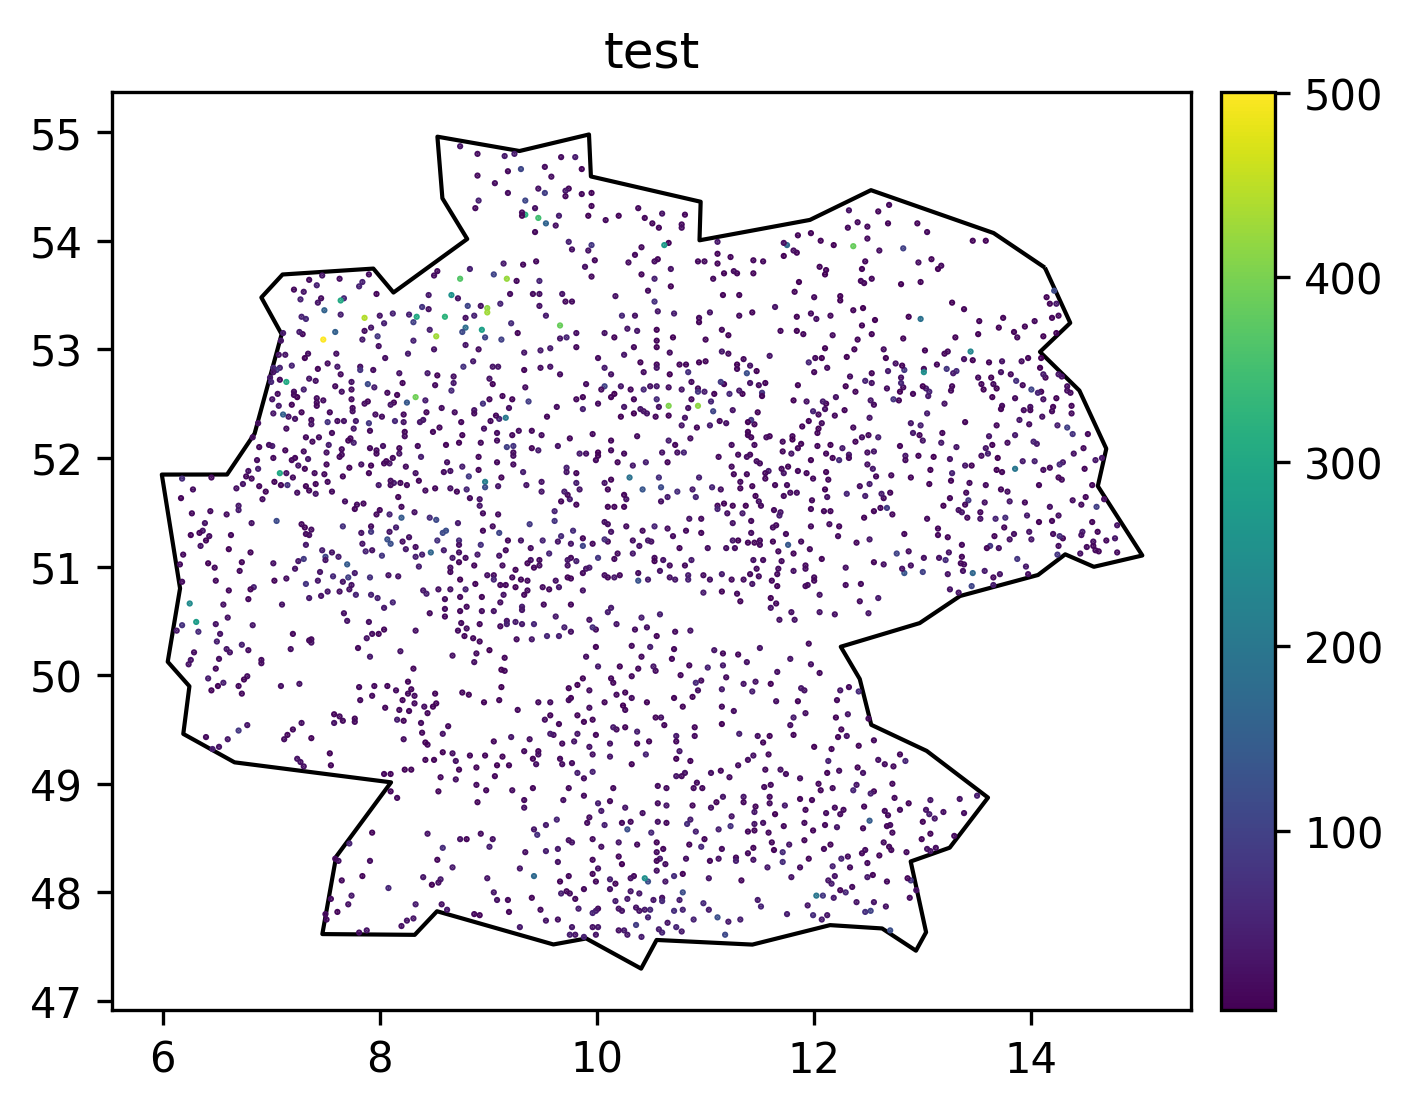

<Figure size 1500x1500 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.dpi"] = 300

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Restrict to Germany
ax = world[world.name == "Germany"].plot(
    color='white', edgecolor='black')
# ax.set_title("Spatial distribution of soil samples, Germany")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

#targets[(targets.OC < (targets.OC.mean() + targets.OC.std() * 3)) & (targets.OC > (targets.OC.mean() - targets.OC.std() * 3))].plot(column='OC', ax=ax, legend=True, cax=cax)

# Plot
gdf.plot(ax=ax, marker = '.', markersize = 1, column = "OC", legend=True, cax = cax)
plt.show()

plt.savefig("germanyplot.png")

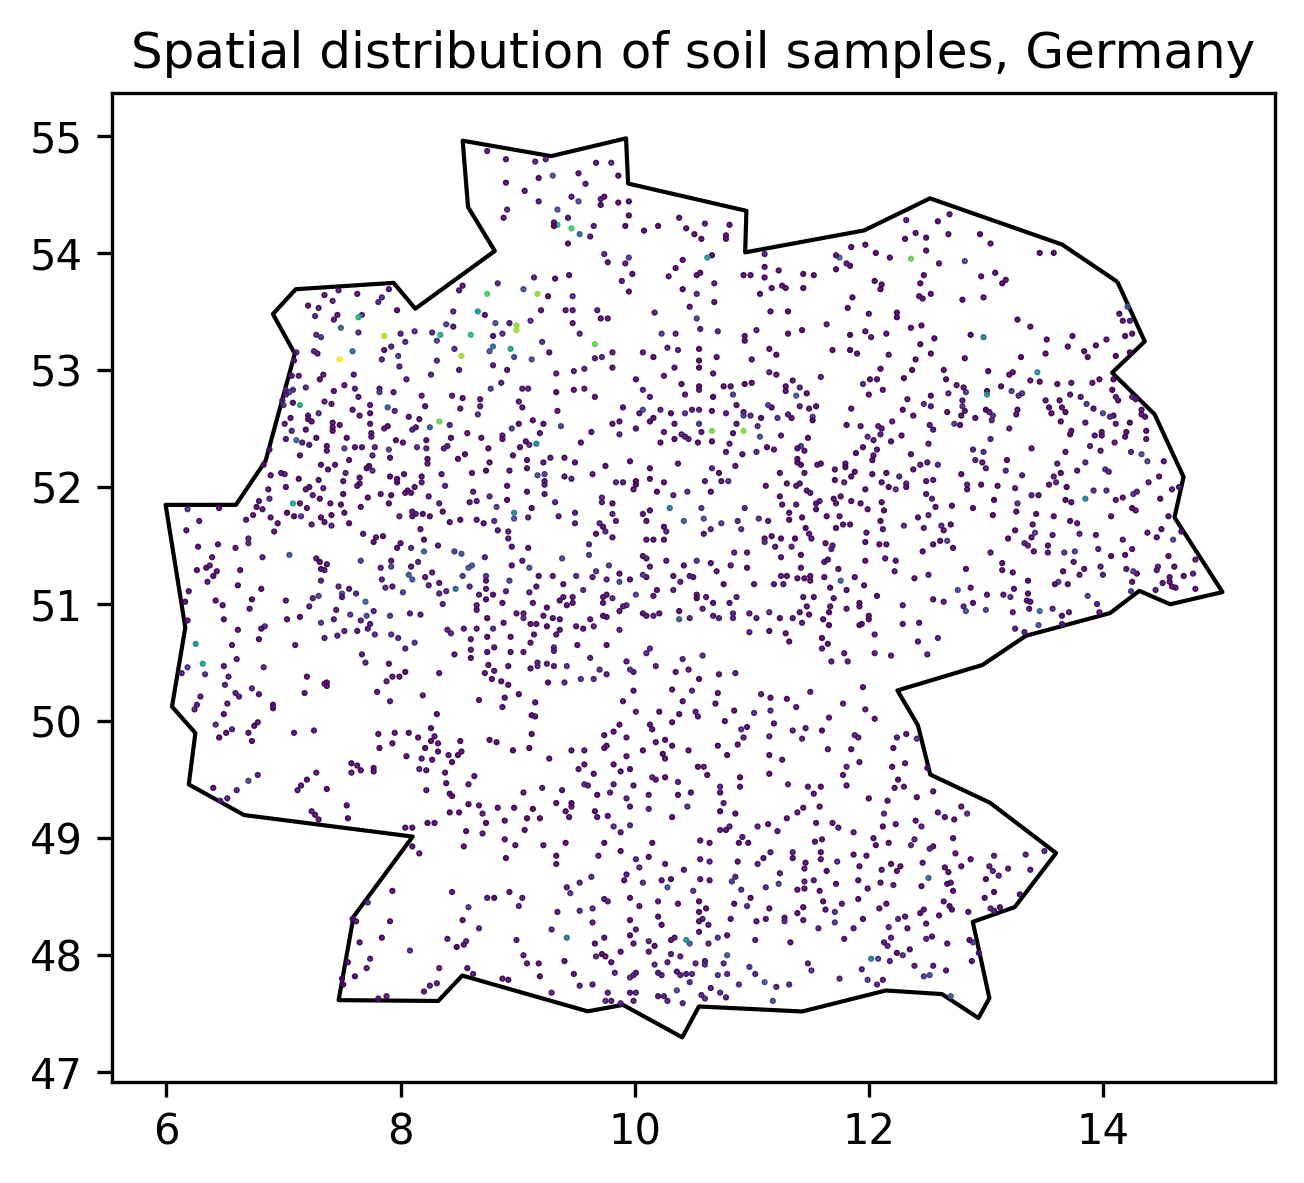

In [16]:
# Restrict to Germany
ax = world[world.name == "Germany"].plot(
    color='white', edgecolor='black')
ax.set_title("Spatial distribution of soil samples, Germany") ## FIX FONTS

# Plot
gdf.plot(ax=ax, marker = '.', markersize = 1, column = "OC", legend=True, cax = cax)
plt.show()

In [10]:
!pip install owslib

     |████████████████████████████████| 204kB 2.8MB/s 
ERROR: Operation cancelled by user


In [0]:
http://data.isric.org/geoserver/sg250m/wps

1938

In [0]:
import owslib

In [0]:
from owslib.wps import WebProcessingService
wps = WebProcessingService('http://data.isric.org/geoserver/sg250m/wps', verbose=False, skip_caps=True)

In [0]:
from owslib.wcs import WebCoverageService

wcs = WebCoverageService('http://data.isric.org/geoserver/sg250m/wcs')

In [0]:
for x in wcs.contents.keys():
    if "ORCDRC"  in x:
        print(x)

sg250m__ORCDRC_M_sl1_250m
sg250m__ORCDRC_M_sl2_250m
sg250m__ORCDRC_M_sl3_250m
sg250m__ORCDRC_M_sl4_250m
sg250m__ORCDRC_M_sl5_250m
sg250m__ORCDRC_M_sl6_250m
sg250m__ORCDRC_M_sl7_250m


In [0]:
oc_map = wcs.contents["sg250m__ORCDRC_M_sl4_250m"]